In [261]:
import pandas as pd
from collections import Counter
import PyPDF2
import nltk
import en_core_web_sm
import spacy
from string import punctuation
from nltk.sentiment import SentimentIntensityAnalyzer
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [262]:
#Automatic research

In [263]:
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN']
    doc = nlp(text.lower()) 
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result

In [264]:
pdf = PyPDF2.PdfFileReader('Treasure-Island.pdf')
number_of_pages = pdf.getNumPages()
book=[]
for i in range(5, number_of_pages):
    page=pdf.getPage(i)
    page_text = page.extractText()
    page_text=page_text.replace("\n", "")
    page_text=page_text.replace("™", "''")
    page_text=page_text.replace("Š", " ")
    page_text=page_text.replace("''", "'")
    page_text=page_text.replace("ﬂ", " ")
    
    book.append(page_text)

In [265]:
book[1]

'CHAPTER 1. THE OLD SEA-DOG AT THE ADMIRAL BENBOW  SQUIRE TRELAWNEY, Dr. Livesey, and the rest of these gentlemen having asked me to write down the whole particulars about Treasure Island, from the beginning to the end, keeping nothing back but the bearings of the island, and that only because there is still treasure not yet lifted, I take up my pen in the year of grace 17__ and go back to the time when my father kept the Admiral Benbow inn and the brown old seaman with the sabre cut first took up his lodging under our roof. I remember him as if it were yesterday, as he came plodding to the inn door, his sea-chest following behind him in a hand-barrow a tall, strong, heavy, nut-brown man, his tarry pigtail falling over the shoulder of his soiled blue coat, his hands ragged and scarred, with black, broken nails, and the sabre cut across one cheek, a dirty, livid white. I remember him looking round the cover and whistling to himself as he did so, and then breaking out in that old sea-son

In [266]:
def no_dots(word):
    for i in word:
        if i=='.' or i=="-":
            return False
        else: pass
    return True

In [267]:
names_pro_page = {}
keywords=[]
sentiment_page=[]
words_sentiment=[]
NN=[]
JJ=[]
VB=[]
nlp = en_core_web_sm.load()
sia = SentimentIntensityAnalyzer()
for i in range(len(book)):
    #adjectives, nouns, verbs
    tokens = nltk.word_tokenize(book[i])
    text = nltk.Text(tokens)
    tags=nltk.pos_tag(text)
    for d in tags:
        if d[1]=="NN":
            NN.append(d[0])
        if d[1]=="JJ":
            JJ.append(d[0])
        if d[1]=="VB":
            VB.append(d[0])
    #characters in the book
    text=book[i]                                                                                                 
    sents = nlp(text) 
    names = [str(ee) for ee in sents.ents if (ee.label_ == 'PERSON')]
    #cleaning names
    unique = []
    for name in names:
        if name not in unique:
            if no_dots(name)==True:
                if  name[0].isupper()==True:
                    if len(name)>2:
                        if name[-2]=="'":
                            name=name[0:-2]
                        unique.append(name)
    names_pro_page[i] = unique
    keywords=keywords+get_hotwords(book[i])
    #sentiment of a page
    sentiment_page.append(sia.polarity_scores(book[i])['compound'])
    #sentiment of words
    words_on_page=book[i].split()
    for word in words_on_page:
        words_sentiment.append((word,sia.polarity_scores(word)['compound']))

In [268]:
names_pro_page

{0: [],
 1: ['Livesey'],
 2: [],
 3: [],
 4: ['Livesey'],
 5: ['Livesey', 'Taylor'],
 6: ['Livesey'],
 7: ['Livesey', 'Bill'],
 8: ['Bill'],
 9: ['Bill', 'Billy', 'Black Dog'],
 10: ['Black Dog', 'Jim'],
 11: ['Livesey', 'Hawkins', 'Jim', 'Prophetic', 'Billy Bones'],
 12: ['Bones'],
 13: ['Jim', 'Yellow Jack'],
 14: ['Jim'],
 15: ['Jim'],
 16: [],
 17: ['Bill'],
 18: [],
 19: ['Livesey', 'Captain Flint'],
 20: ['Livesey', 'Jim', 'Crossley'],
 21: ['Jim', 'Mother'],
 22: ['Crossley'],
 23: [],
 24: ['Bill'],
 25: ['Bill'],
 26: ['Bill', 'Georges'],
 27: ['Livesey', 'Dance'],
 28: ['Pew', 'Dance', 'Hawkins', 'Livesey'],
 29: ['Livesey', 'Dance'],
 30: ['Trelawney', 'Dance', 'Hawkins', 'Jim', 'Jim Hawkins', 'Livesey'],
 31: ['Englishman', 'Hawkins', 'Jim', 'Livesey', 'Billy Bones'],
 32: ['Livesey', 'Offe Caraccas'],
 33: ['Livesey', 'Hawkins', 'Joyce', 'Hunter'],
 34: ['Jim', 'Joyce', 'Hunter'],
 35: [],
 36: ['Livesey', 'Tom Redruth', 'Hawkins'],
 37: ['Livesey'],
 38: [],
 39: [],
 40:

In [269]:
Counter(keywords).most_common(20) #20 most common words

[('man', 259),
 ('captain', 234),
 ('silver', 221),
 ('doctor', 172),
 ('time', 131),
 ('good', 128),
 ('old', 117),
 ('hand', 117),
 ('ship', 114),
 ('sea', 110),
 ('squire', 104),
 ('men', 102),
 ('sir', 102),
 ('hands', 101),
 ('little', 99),
 ('jim', 96),
 ('way', 92),
 ('house', 84),
 ('john', 84),
 ('island', 80)]

In [270]:
Counter(NN).most_common(20) #most common nouns

[('man', 255),
 ('captain', 184),
 ('doctor', 151),
 ('time', 129),
 ('hand', 119),
 ('ship', 111),
 ('squire', 95),
 ('way', 86),
 ('side', 83),
 ('head', 74),
 ('sir', 72),
 ('moment', 68),
 ('house', 66),
 ('word', 57),
 ('island', 56),
 ('sea', 54),
 ('voice', 53),
 ('nothing', 51),
 ('face', 51),
 ('door', 49)]

In [271]:
Counter(VB).most_common(20)

[('be', 239),
 ('have', 186),
 ('see', 98),
 ('get', 65),
 ('say', 62),
 ('take', 62),
 ('go', 59),
 ('do', 59),
 ('know', 46),
 ('tell', 45),
 ('make', 43),
 ('hear', 39),
 ('come', 37),
 ('lay', 33),
 ('give', 32),
 ('keep', 31),
 ('think', 30),
 ('find', 30),
 ('let', 28),
 ('put', 28)]

In [272]:
Counter(JJ).most_common(20)

[('good', 119),
 ('old', 112),
 ('last', 106),
 ('little', 100),
 ('other', 83),
 ('great', 78),
 ('dead', 68),
 ('first', 67),
 ('sure', 67),
 ('much', 63),
 ('same', 62),
 ('own', 57),
 ('open', 41),
 ('long', 41),
 ('poor', 34),
 ('low', 33),
 ('next', 33),
 ('clear', 31),
 ('many', 31),
 ('whole', 29)]

In [273]:
sentiment_page  #skala od -1 do 1, gdzie 1 oznacza najbardziej pozytywny a -1 najbardziej negatywny

[0.0,
 -0.8635,
 0.9654,
 -0.9854,
 -0.9124,
 -0.5285,
 0.6956,
 0.1239,
 0.972,
 0.7052,
 -0.9864,
 0.9925,
 0.1578,
 -0.834,
 -0.7438,
 -0.9967,
 -0.9763,
 0.6435,
 -0.9837,
 -0.9723,
 -0.182,
 0.9927,
 0.704,
 -0.5546,
 -0.9915,
 -0.9899,
 -0.9962,
 -0.9425,
 0.9342,
 0.9957,
 0.9421,
 0.9134,
 0.7249,
 0.9925,
 -0.3802,
 0.0,
 0.9149,
 0.9718,
 -0.7438,
 0.9565,
 0.9602,
 -0.6695,
 0.9856,
 -0.4912,
 0.9938,
 0.8966,
 0.9746,
 0.9965,
 0.9652,
 -0.9607,
 0.9815,
 0.7043,
 0.8978,
 0.3403,
 -0.4215,
 0.977,
 -0.3661,
 0.9132,
 -0.8493,
 -0.296,
 0.9373,
 0.8645,
 0.9772,
 0.9401,
 -0.9222,
 0.3816,
 -0.874,
 0.755,
 0.9836,
 0.8115,
 0.9666,
 0.3182,
 -0.6295,
 0.8135,
 0.7802,
 0.8359,
 -0.4753,
 0.9748,
 0.8799,
 0.7771,
 -0.9928,
 -0.9755,
 -0.9753,
 -0.8202,
 0.9526,
 0.9918,
 -0.9544,
 -0.9719,
 0.0,
 -0.9723,
 0.892,
 -0.9542,
 0.9787,
 0.4118,
 0.4678,
 0.7242,
 -0.935,
 -0.9724,
 -0.0516,
 -0.9201,
 -0.64,
 -0.9022,
 0.6528,
 -0.5386,
 0.9958,
 0.8888,
 0.9284,
 -0.9221,
 0.

In [274]:
pos=[]
neg=[]
for i in words_sentiment:
    if i[1]>0:
        pos.append(i)
    elif i[1]<0:
        neg.append(i)

In [275]:
Counter(pos).most_common(20)

[(('like', 0.3612), 186),
 (('good', 0.4404), 103),
 (('great', 0.6249), 75),
 (('hand', 0.4939), 68),
 (('sure', 0.3182), 43),
 (('help', 0.4019), 37),
 (('Well,', 0.2732), 34),
 (('hand,', 0.4939), 32),
 (('well', 0.2732), 29),
 (('pretty', 0.4939), 27),
 (('clear', 0.3818), 27),
 (('want', 0.0772), 26),
 (('kind', 0.5267), 26),
 (('best', 0.6369), 23),
 (('aboard', 0.0258), 22),
 (('well,', 0.2732), 21),
 (('treasure', 0.296), 19),
 (('better', 0.4404), 19),
 (('straight', 0.2263), 19),
 (('Admiral', 0.3182), 18)]

In [276]:
Counter(neg).most_common(20)

[(('no', -0.296), 135),
 (('cried', -0.3818), 71),
 (('dead', -0.6486), 47),
 (('cut', -0.2732), 39),
 (('poor', -0.4767), 33),
 (('low', -0.2732), 28),
 (('blind', -0.4019), 24),
 (('struck', -0.25), 24),
 (('lost', -0.3182), 22),
 (('cried.', -0.3818), 22),
 (('fire', -0.34), 21),
 (('fear', -0.4939), 20),
 (('fallen', -0.3612), 19),
 (('broken', -0.4767), 17),
 (('block', -0.4404), 17),
 (('bad', -0.5423), 16),
 (('broke', -0.4215), 16),
 (('hard', -0.1027), 16),
 (('cry', -0.4767), 16),
 (('leave', -0.0516), 15)]

In [277]:
co_aperance=[]
for i in list(names_pro_page.values()):
    if len(i)>1:
        vector=i
        vector.sort()
        for j in range(len(vector)):
            for k in range(j+1,len(vector)):
                co_aperance.append((vector[j],vector[k]))
            

In [278]:
A=Counter(co_aperance)

In [279]:
edges=list(A)

In [280]:
values=list(A.values())

In [281]:
for i in range(len(edges)):
    a,b=edges[i]
    edges[i]=(a,b,values[i])

In [282]:
G = nx.Graph()

In [283]:
G.add_weighted_edges_from(edges)

In [284]:
G.edges.data('weight')

EdgeDataView([('Livesey', 'Taylor', 1), ('Livesey', 'Bill', 1), ('Livesey', 'Billy Bones', 3), ('Livesey', 'Hawkins', 12), ('Livesey', 'Jim', 10), ('Livesey', 'Prophetic', 1), ('Livesey', 'Captain Flint', 1), ('Livesey', 'Crossley', 1), ('Livesey', 'Dance', 4), ('Livesey', 'Pew', 1), ('Livesey', 'Jim Hawkins', 2), ('Livesey', 'Trelawney', 6), ('Livesey', 'Englishman', 1), ('Livesey', 'Offe Caraccas', 1), ('Livesey', 'Hunter', 3), ('Livesey', 'Joyce', 2), ('Livesey', 'Tom Redruth', 1), ('Livesey', 'John Silver', 1), ('Livesey', 'Long John', 2), ('Livesey', 'Arrow', 2), ('Livesey', 'Possibly', 1), ('Livesey', 'Smollett', 9), ('Livesey', 'John', 4), ('Livesey', 'Noah', 1), ('Livesey', 'Kidd', 1), ('Livesey', 'Anderson', 2), ('Livesey', 'Tom', 1), ('Livesey', 'Maker', 1), ('Livesey', 'Ben Gunn', 5), ('Livesey', 'Dick Johnson', 1), ('Livesey', 'Silver', 2), ('Livesey', 'Flint', 1), ('Livesey', 'Dick', 1), ('Livesey', 'Merry', 1), ('Livesey', 'Morgan', 1), ('Bill', 'Billy', 1), ('Bill', 'Bla

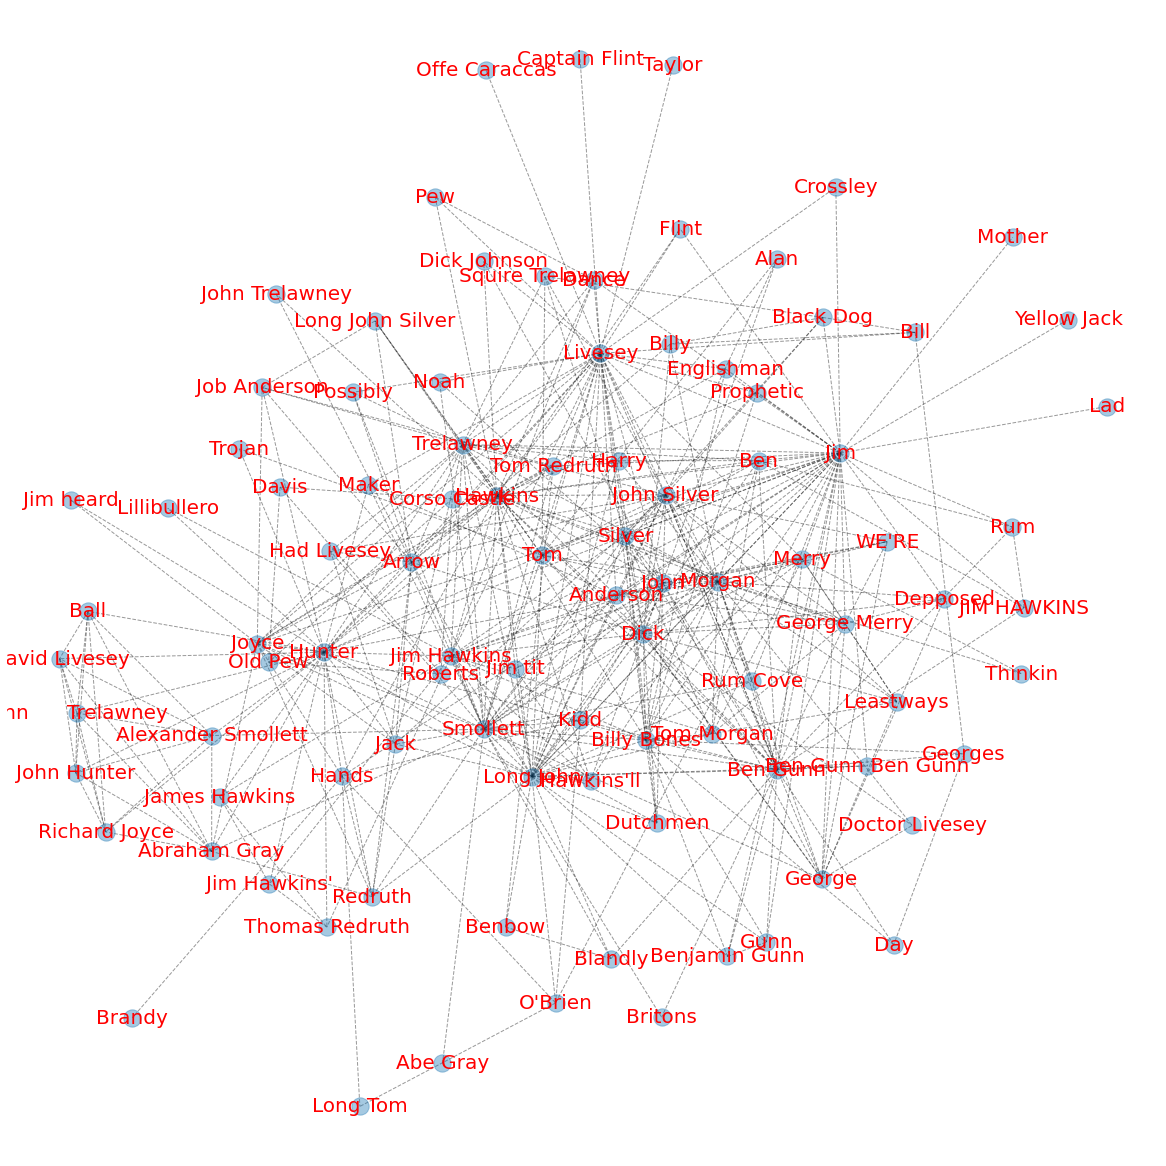

In [285]:
fig= plt.figure(figsize=(16,16))
nx.draw(G, pos = nx.kamada_kawai_layout(G), alpha=0.4, style='--')
nx.draw_networkx_labels(G, pos = nx.kamada_kawai_layout(G), font_color = 'red', font_size=20)
plt.show()

In [286]:
#Listed research

In [287]:
List_of_characters=['Jim Hawkins','Tom Morgan','George Merry',"O'Brien",'Dick Johnson','Flint','James Hawkins','Yellow Jack', 'Mother','Dance','Hunter','Joyce','Arrow','Abraham Gray',"Alan",'Job Anderson','Crossley','Grey', 'Billy Bones', 'Black Dog', 'Squire Trelawney', 'David Livesey', 'Captain Alexander Smollett', 'Long John Silver', 'Benjamin Gunn', 'Old Pew', 'Israel Hands', 'Thomas Redruth']

In [288]:
for i in range(len(book)):
    names_page=[]
    for j in range(len(names_pro_page[i])):
        name=names_pro_page[i][j]
        for k in List_of_characters:
            if name in k:
                names_page.append(k)
            elif name not in k and ' ' in name:
                if name.split()[0] in k or name.split()[1] in k:
                    names_page.append(k)
    names_pro_page[i]=names_page

In [289]:
names_pro_page

{0: [],
 1: ['David Livesey'],
 2: [],
 3: [],
 4: ['David Livesey'],
 5: ['David Livesey'],
 6: ['David Livesey'],
 7: ['Billy Bones', 'David Livesey'],
 8: ['Billy Bones'],
 9: ['Billy Bones', 'Billy Bones', 'Black Dog'],
 10: ['Black Dog', 'Jim Hawkins'],
 11: ['Billy Bones',
  'Jim Hawkins',
  'James Hawkins',
  'Jim Hawkins',
  'David Livesey'],
 12: ['Billy Bones'],
 13: ['Jim Hawkins', 'Yellow Jack'],
 14: ['Jim Hawkins'],
 15: ['Jim Hawkins'],
 16: [],
 17: ['Billy Bones'],
 18: [],
 19: ['Flint', 'Captain Alexander Smollett', 'David Livesey'],
 20: ['Crossley', 'Jim Hawkins', 'David Livesey'],
 21: ['Jim Hawkins', 'Mother'],
 22: ['Crossley'],
 23: [],
 24: ['Billy Bones'],
 25: ['Billy Bones'],
 26: ['Billy Bones'],
 27: ['Dance', 'David Livesey'],
 28: ['Dance', 'Jim Hawkins', 'James Hawkins', 'David Livesey', 'Old Pew'],
 29: ['Dance', 'David Livesey'],
 30: ['Dance',
  'Jim Hawkins',
  'James Hawkins',
  'Jim Hawkins',
  'Jim Hawkins',
  'James Hawkins',
  'David Livesey',

In [290]:
co_aperance=[]
for i in list(names_pro_page.values()):
    if len(i)>1:
        vector=i
        vector.sort()
        for j in range(len(vector)):
            for k in range(j+1,len(vector)):
                co_aperance.append((vector[j],vector[k]))
            

In [291]:
A=Counter(co_aperance)

In [292]:
edges=list(A)

In [293]:
values=list(A.values())

In [294]:
for i in range(len(edges)):
    a,b=edges[i]
    edges[i]=(a,b,values[i])

In [295]:
G = nx.Graph()

In [296]:
G.add_weighted_edges_from(edges)

In [297]:
G.edges.data('weight')

EdgeDataView([('Billy Bones', 'David Livesey', 4), ('Billy Bones', 'Billy Bones', 1), ('Billy Bones', 'Black Dog', 2), ('Billy Bones', 'James Hawkins', 3), ('Billy Bones', 'Jim Hawkins', 6), ('Billy Bones', 'Captain Alexander Smollett', 2), ('Billy Bones', 'Dick Johnson', 5), ('Billy Bones', 'Long John Silver', 5), ('Billy Bones', 'Arrow', 1), ('Billy Bones', 'Hunter', 1), ('Billy Bones', 'Benjamin Gunn', 3), ('Billy Bones', 'Tom Morgan', 3), ('David Livesey', 'James Hawkins', 14), ('David Livesey', 'Jim Hawkins', 24), ('David Livesey', 'Captain Alexander Smollett', 12), ('David Livesey', 'Flint', 2), ('David Livesey', 'Crossley', 1), ('David Livesey', 'Dance', 4), ('David Livesey', 'Old Pew', 1), ('David Livesey', 'Squire Trelawney', 8), ('David Livesey', 'Hunter', 5), ('David Livesey', 'Joyce', 3), ('David Livesey', 'Thomas Redruth', 1), ('David Livesey', 'Tom Morgan', 4), ('David Livesey', 'Dick Johnson', 13), ('David Livesey', 'Long John Silver', 12), ('David Livesey', 'Arrow', 3),

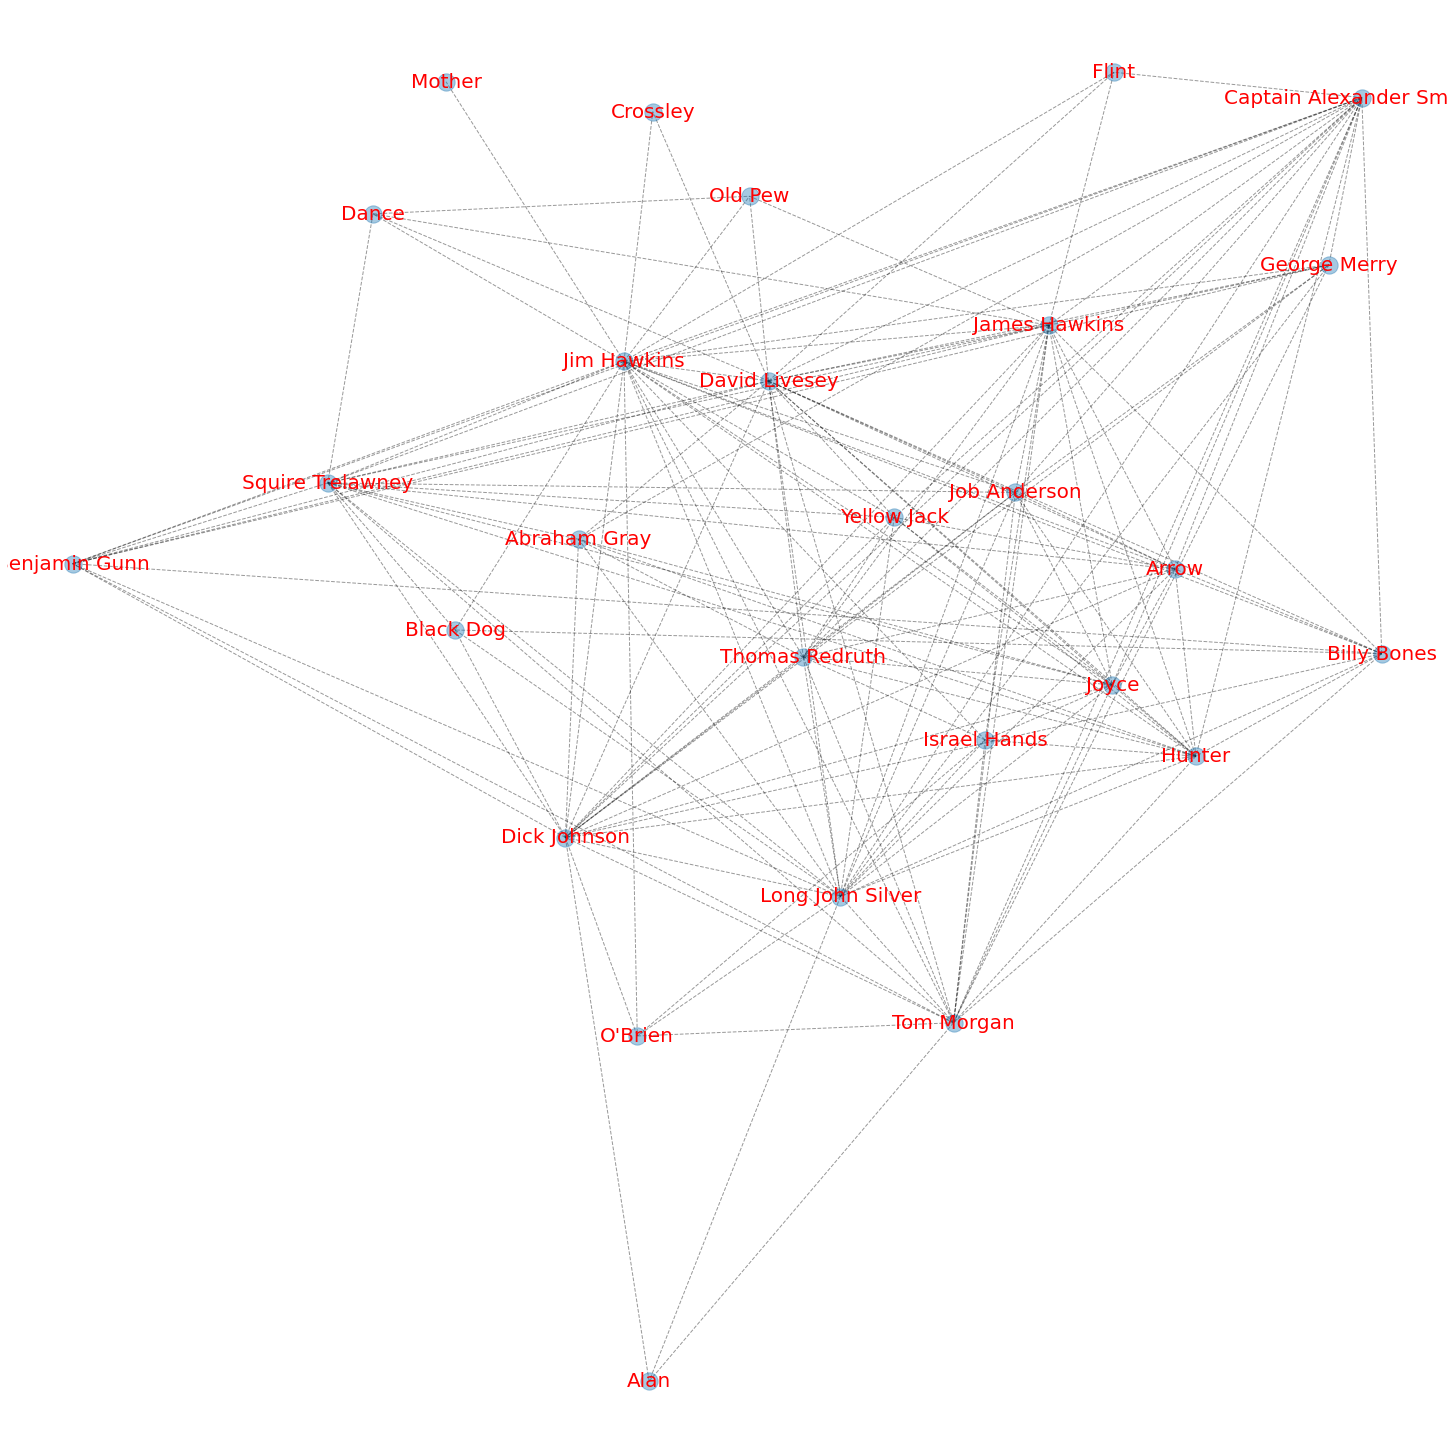

In [298]:
fig= plt.figure(figsize=(20,20))
nx.draw(G, pos = nx.kamada_kawai_layout(G), alpha=0.4, style='--')
nx.draw_networkx_labels(G, pos = nx.kamada_kawai_layout(G), font_color = 'red', font_size=20)
plt.show()

In [299]:
pic_words = Counter(keywords).most_common(200)
pic_words = list(dict(pic_words).keys())

In [300]:
text = ''
for word in pic_words:
    text += ' '+word

In [301]:
wordcloud = WordCloud().generate(text)

In [302]:
mask = np.array(Image.open("chest.png"))

In [303]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [304]:
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))

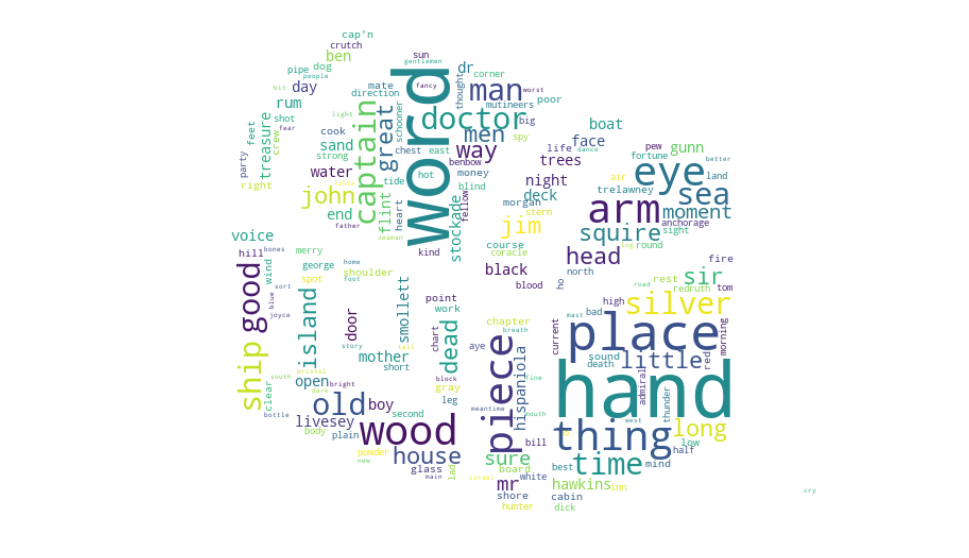

In [306]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_mask)
wc.generate(text)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()